In [39]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv', sep=';')

In [3]:
df

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
...,...,...,...,...
4995,735000,70,0.479357,0.752891
4996,900000,128,8.594487,0.370170
4997,800000,70,0.253138,0.421407
4998,190000,55,8.945226,0.680963


## Dataset 
### Valor - valor de oferta do imóvel (Reais)
### Area - area do imovel em metros quadrados
### Dist_Praia - Distancia do imovel ate a praia (KM) em linha reta
### Dist_Farmacia - distancia do imovel ate a farmacia mais proxima (KM) em linha reta

In [5]:
df.shape

(5000, 4)

In [13]:
df.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [14]:
df.corr().round(3)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000,0.711,-0.367,-0.024
Area,0.711,1.000,-0.283,-0.031
Dist_Praia,-0.367,-0.283,1.000,0.026
Dist_Farmacia,-0.024,-0.031,0.026,1.000


## Analise grafica dos dados

In [17]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

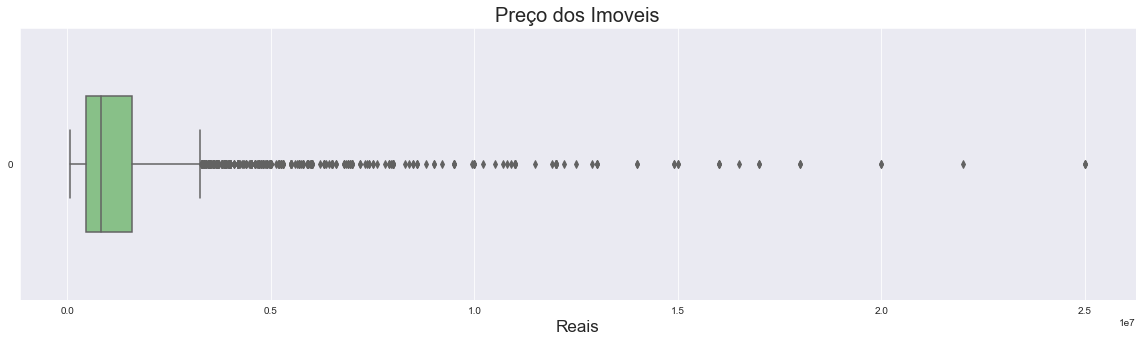

In [19]:
ax = sns.boxplot(data=df['Valor'], orient='h', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos Imoveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=17)
ax;

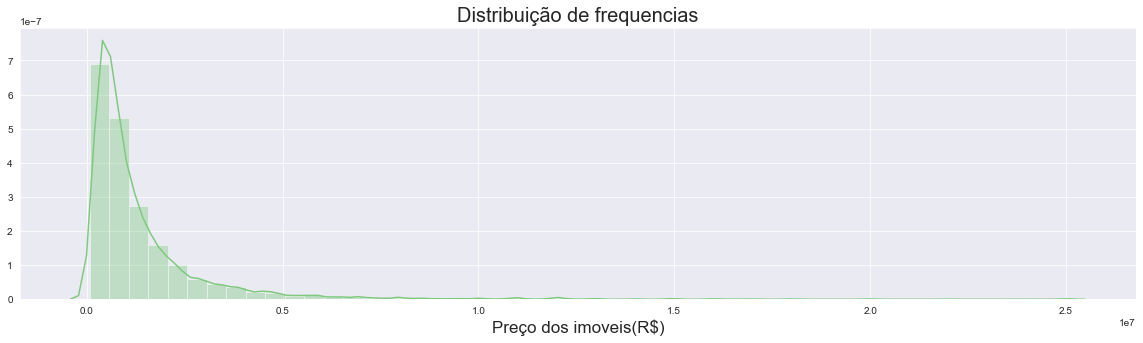

In [21]:
ax = sns.distplot(df['Valor'])
ax.figure.set_size_inches(20,5)
ax.set_title('Distribuição de frequencias', fontsize=20)
ax.set_xlabel('Preço dos imoveis(R$)', fontsize=17)
ax;

## Graficos de dispersão entre as variaveis

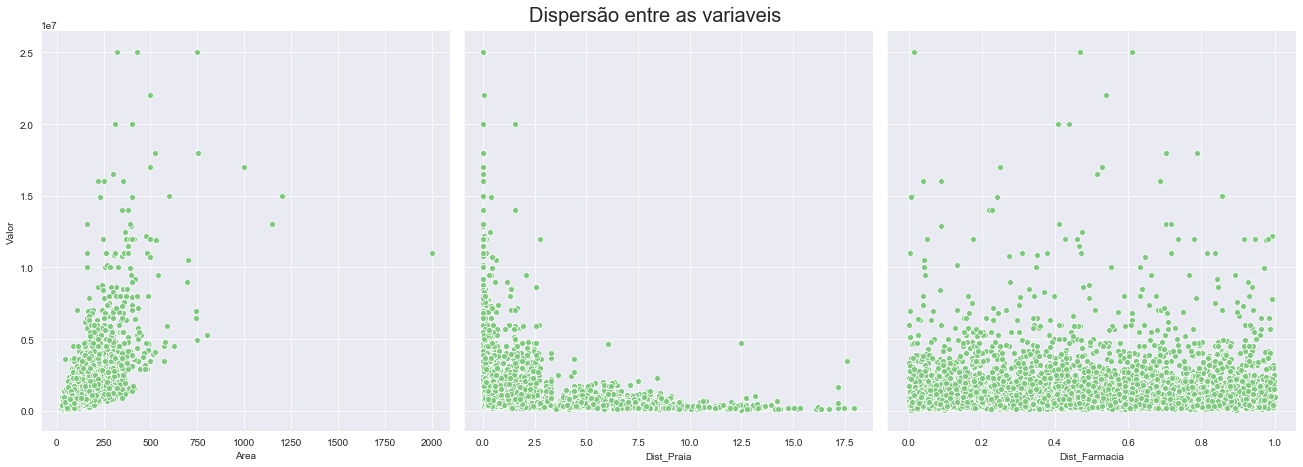

In [35]:
ax = sns.pairplot(df, y_vars='Valor',x_vars=['Area','Dist_Praia','Dist_Farmacia'], height=6)
ax.fig.suptitle('Dispersão entre as variaveis', fontsize = 20, y=1.05);


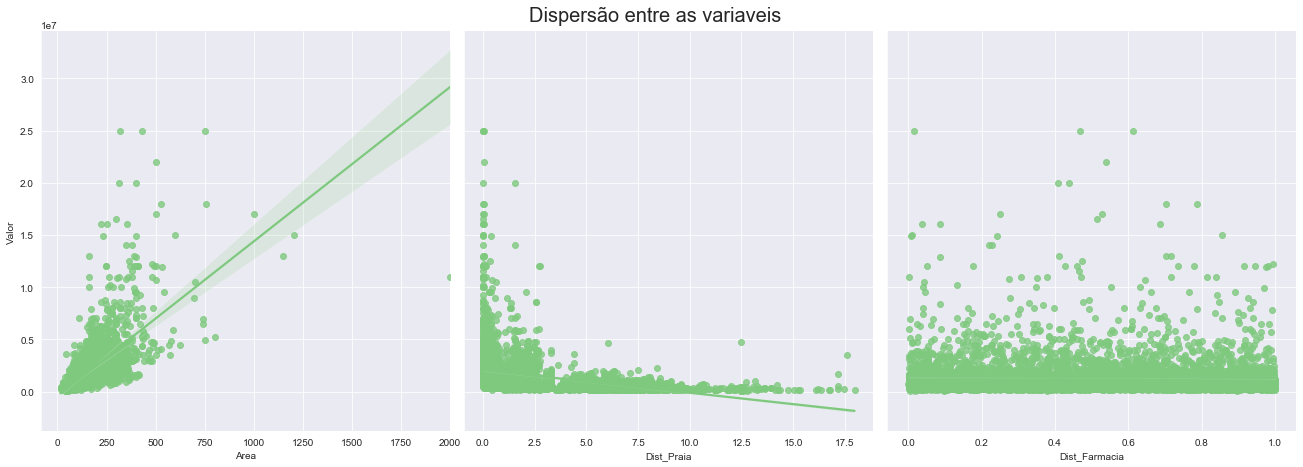

In [38]:
ax = sns.pairplot(df, y_vars='Valor',x_vars=['Area','Dist_Praia','Dist_Farmacia'], height=6, kind='reg')
ax.fig.suptitle('Dispersão entre as variaveis', fontsize = 20, y=1.05);



# Transformando os Dados

In [41]:
df['log_Valor'] = np.log(df['Valor'])
df['log_Area'] = np.log(df['Area'])
df['log_Dist_Praia'] = np.log(df['Dist_Praia'] + 1)
df['log_Dist_Farmacia'] = np.log(df['Dist_Farmacia'] + 1)

In [42]:
df.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


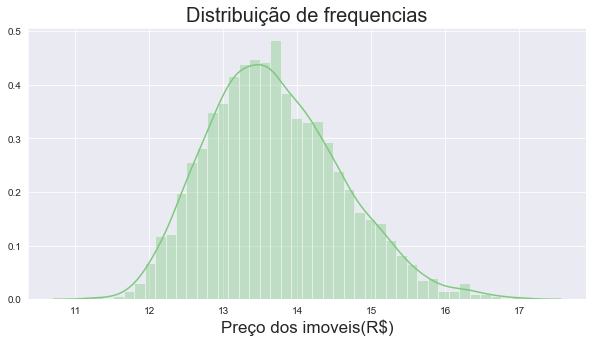

In [44]:
ax = sns.distplot(df['log_Valor'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de frequencias', fontsize=20)
ax.set_xlabel('Preço dos imoveis(R$)', fontsize=17)
ax;

## Verificando a relação linear

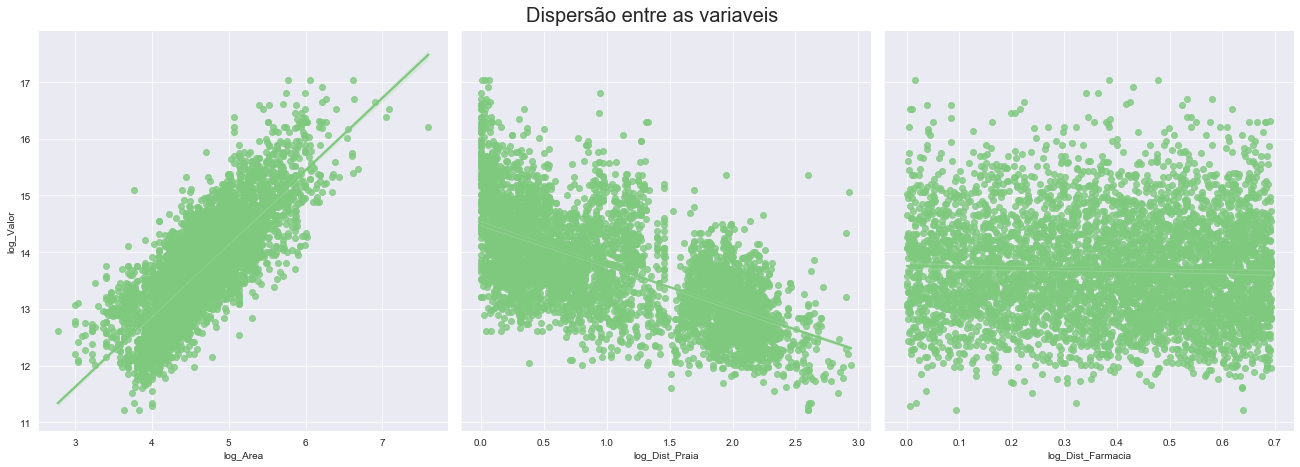

In [45]:
ax = sns.pairplot(df, y_vars='log_Valor',x_vars=['log_Area','log_Dist_Praia','log_Dist_Farmacia'], height=6, kind='reg')
ax.fig.suptitle('Dispersão entre as variaveis', fontsize = 20, y=1.05);


# Criando os Dataset de treino e teste

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
y = df['log_Valor']

In [48]:
X = df[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Usando StatsModel 

In [50]:
import statsmodels.api as sm

In [51]:
X_train_const =  sm.add_constant(X_train)

In [52]:
X_train_const

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2668,1.0,4.744932,0.862382,0.621072
4313,1.0,5.337538,0.036448,0.172019
2308,1.0,5.181784,0.361521,0.020530
275,1.0,3.828641,2.321044,0.513754
3927,1.0,4.700480,0.408878,0.640512
...,...,...,...,...
1205,1.0,5.323010,0.174833,0.374748
603,1.0,4.744932,2.202238,0.104292
2394,1.0,4.317488,1.873701,0.658171
3744,1.0,4.356709,2.156947,0.065133


In [53]:
stats_modelo = sm.OLS(y_train, X_train_const,hasconst=True).fit()

In [54]:
stats_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     4747.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:18:05   Log-Likelihood:                -1758.2
No. Observations:                3500   AIC:                             3524.
Df Residuals:                    3496   BIC:                             3549.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.4355      0.065    145.885      0.000       9.309       9.562
log_Area              1.0379      0.013     81.950      0.000       1.013       1.063
log_Dist_Praia       -0.5000      0.009    -54.537      0.000      -0.518      -0.482
log_Dist_Farmacia     0.0004      0.034      0.011      0.991      -0.067       0.068
==============================================================================
Omnibus:                       37.048   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.696
Skew:                           0.106   Prob(JB):                     1.33e-12
Kurtosis:                       3.575   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X = df[['log_Area','log_Dist_Praia']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
X_train_const =  sm.add_constant(X_train)

In [60]:
stats_modelo = sm.OLS(y_train, X_train_const,hasconst=True).fit()

In [61]:
stats_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     7062.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:36:36   Log-Likelihood:                -1776.0
No. Observations:                3500   AIC:                             3558.
Df Residuals:                    3497   BIC:                             3577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3988      0.063    149.331      0.000       9.275       9.522
log_Area           1.0446      0.013     82.407      0.000       1.020       1.069
log_Dist_Praia    -0.4913      0.009    -53.545      0.000      -0.509      -0.473
==============================================================================
Omnibus:                       69.028   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.318
Skew:                           0.123   Prob(JB):                     1.37e-28
Kurtosis:                       3.905   Cond. No.                         46.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
modelo = LinearRegression()

In [64]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print('R2 = {}'.format(modelo.score(X_train, y_train).round(3)))

R2 = 0.802


In [66]:
y_predict = modelo.predict(X_test)

In [71]:
print('R2 = {}'.format(metrics.r2_score(y_test,y_predict).round(3)))

R2 = 0.803


In [76]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
4293,6.184149,0.0


In [77]:
modelo.predict(entrada)[0]

15.858809022346883

## Transformando de log para reais novamente usando a função exp

In [79]:
np.exp(modelo.predict(entrada)[0]).round(3)

7716018.282

In [100]:
area = 250
dist_praia = 1

entrada = [[np.log(area),np.log(dist_praia + 1)]]

print('R$ {}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))

R$ 2747052.18


## Alguns graficos para ver o resultado 

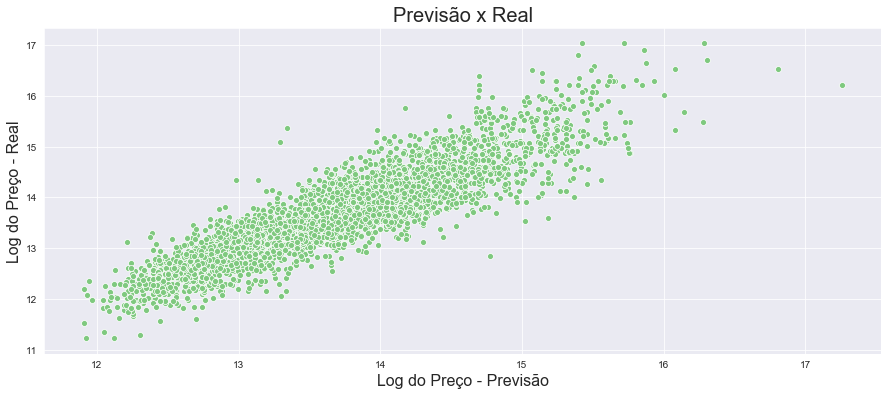

In [106]:
y_prev_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_prev_train, y= y_train)
ax.figure.set_size_inches(15,6)
ax.set_title('Previsão x Real', fontsize=20)
ax.set_xlabel('Log do Preço - Previsão', fontsize =16)
ax.set_ylabel('Log do Preço - Real', fontsize = 16);

In [109]:
residuo = y_train - y_prev_train
residuo

3940   -0.622115
523     0.351379
1754   -0.196403
3758    0.408675
1371   -0.029640
          ...   
90      0.001869
2416   -0.089260
301    -0.028806
418    -1.094818
64     -0.428467
Name: log_Valor, Length: 3500, dtype: float64

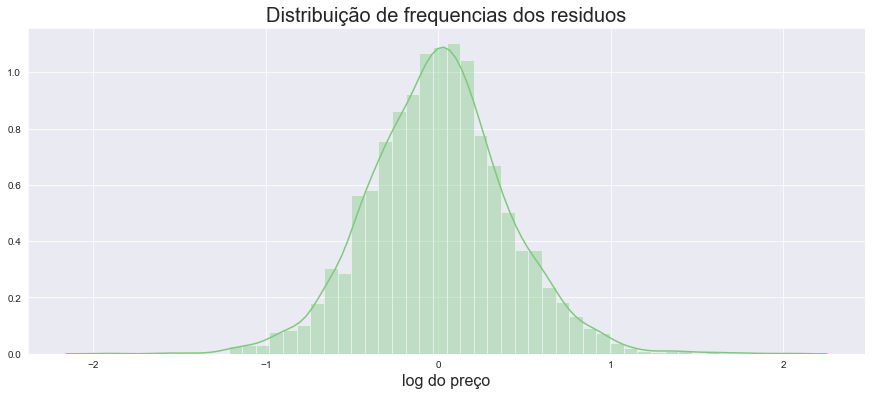

In [113]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(15,6)
ax.set_title('Distribuição de frequencias dos residuos', fontsize=20)
ax.set_xlabel('log do preço', fontsize=16);